In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from matplotlib import mlab
from scipy import signal, stats
from sklearn import preprocessing
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
Tokyo_station_mobile_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Tokyostation/Tokyostation_2021.npy"
Tokyo_station_tweets_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Tokyostation_2021/outlier/Tokyostation_3zi_2021.npy"

Kyoto_station_mobile_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Kyoto/Kyotostation.npy"
Kyoto_station_tweets_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Kyoto/users/Kyotostation_users.npy"

Arashi_mobile_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Kyoto/Arashiyama_3zi_2022.npy"
Arashi_tweets_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Kyoto/users/Arashiyama_users.npy"

High_mobile_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Kyoto/Highclass_3zi_2022.npy"
High_tweets_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Kyoto/users/Highclass_users.npy"

Kinkaku_mobile_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Kyoto/Kinkaku_3zi_2022.npy"
Kinkaku_tweets_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Kyoto/users/Kinkaku_users.npy"

Kiyomizu_mobile_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Kyoto/Kiyomizu_3zi_2022.npy"
Kiyomizu_tweets_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Kyoto/users/Kiyomizu_users.npy"

Lowclass_mobile_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Kyoto/Lowclass_3zi_2022.npy"
Lowclass_tweets_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Kyoto/users/Lowclass_users.npy"

Nizyou_mobile_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Kyoto/Nizyou_3zi_2022.npy"
Nizyou_tweets_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Kyoto/users/Nizyou_users.npy"

Touzi_mobile_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Kyoto/Touzi_3zi_2022.npy"
Touzi_tweets_PATH = "/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Kyoto/users/Touzi_users.npy"

list_mobile = [
    Tokyo_station_mobile_PATH,
    Arashi_mobile_PATH,
    High_mobile_PATH,
    Kinkaku_mobile_PATH,
    Kiyomizu_mobile_PATH,
    Lowclass_mobile_PATH,
    Nizyou_mobile_PATH,
    Touzi_mobile_PATH,
    Kyoto_station_mobile_PATH,
]
list_twitter = [
    Tokyo_station_tweets_PATH,
    Arashi_tweets_PATH,
    High_tweets_PATH,
    Kinkaku_tweets_PATH,
    Kiyomizu_tweets_PATH,
    Lowclass_tweets_PATH,
    Nizyou_tweets_PATH,
    Touzi_tweets_PATH,
    Kyoto_station_tweets_PATH,
]
list_key = [
    "東京駅",
    "嵐山",
    "中京区",
    "金閣寺",
    "清水寺",
    "学生街",
    "二条城",
    "東寺",
    "京都駅",
]

In [59]:
len(list_mobile)
for i in range(0, 1):
    mobile = np.load(list_mobile[i])
    tweets = np.load(list_twitter[i])
    mobile = mobile.flatten()
    tweets = tweets.flatten()
    correlation, p_value = stats.pearsonr(mobile, tweets)
    tmp = np.stack([tweets, mobile])
    df_mobile_tweets = pd.DataFrame(data=tmp.T, columns=["Tweets_num", "Population"])
    g = sns.jointplot(x="Population", y="Tweets_num", data=df_mobile_tweets, s=2)
    g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
    g.plot_joint(sns.regplot, color="g", scatter=False, ci=None)

<Axes: xlabel='Population', ylabel='Tweets_num'>

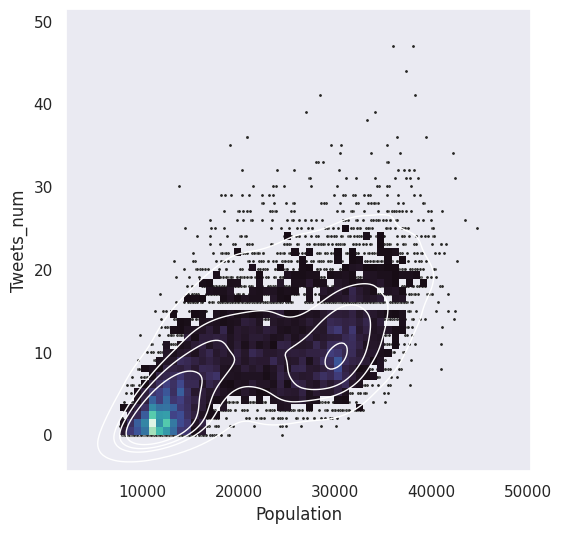

In [51]:
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x = df_mobile_tweets.Population
y = df_mobile_tweets.Tweets_num
# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

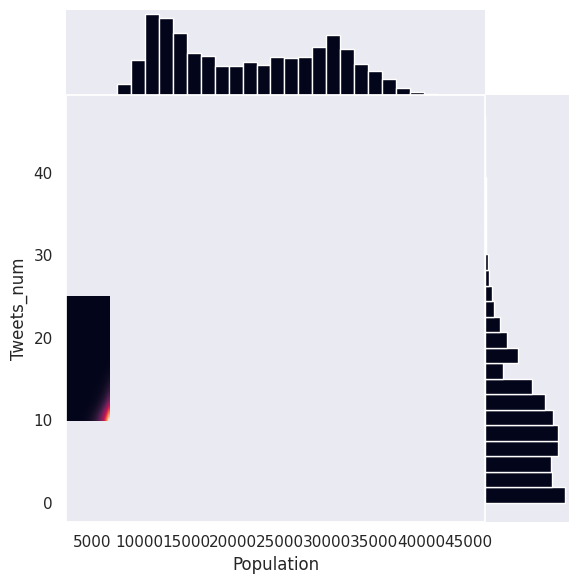

In [52]:
g = sns.JointGrid(x="Population", y="Tweets_num", data=df_mobile_tweets, space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

In [11]:
tmp = np.stack([tweets, mobile])
df_mobile_tweets = pd.DataFrame(data=tmp.T, columns=["Tweets_num", "Population"])

In [12]:
df_mobile_tweets

,Tweets_num,Population
0,10,5509
1,2,5315
2,0,5261
3,2,5197
4,1,5172
...,...,...
8755,23,20956
8756,21,17201
8757,16,14185
8758,11,11374


In [18]:
fig = go.Figure()

# 料金とチップの散布図（Lunch）
fig.add_trace(
  go.Scatter(
    x=df_mobile_tweets['Population'], y=df_mobile_tweets['Tweets_num'],
    name='Lunch', mode='markers', opacity=0.7,
  )
)

fig.add_trace(
  go.Histogram2d(
    x=df_mobile_tweets['Population'], y=df_mobile_tweets['Tweets_num'],
    nbinsx=10, nbinsy=10
  )
)

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000.]),
 [Text(-20000.0, 0, '−20000'),
  Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000'),
  Text(140000.0, 0, '140000')])

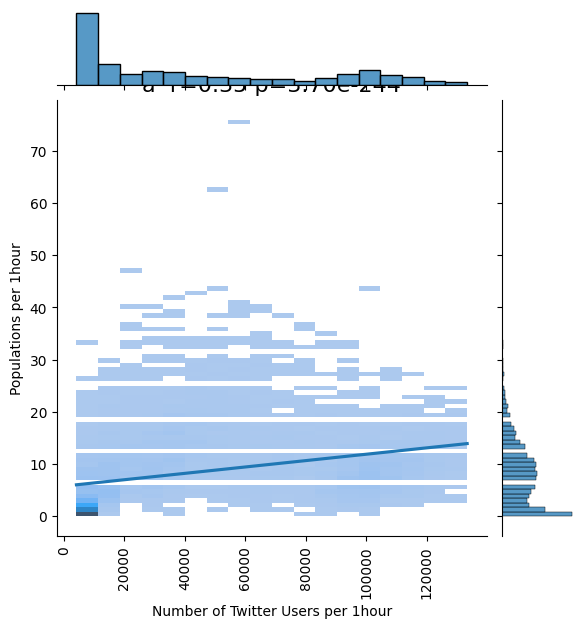

In [24]:

#sns.scatterplot(x="Population", y="Tweets_num", data=df_mobile_tweets, alpha=0.1)
sns.jointplot(x="Population", y="Tweets_num", data=df_mobile_tweets, kind='kde')
sns.regplot(
    x="Population", y="Tweets_num", data=df_mobile_tweets, scatter=False, ci=None
)
# sns.regplot(x="Tweets_num", y="Population", data=df2glaph)
# plt.xticks(x_axis, x_axis)
plt.xlabel("Number of Twitter Users per 1hour")
plt.ylabel("Populations per 1hour")
plt.title("{}  r={:.2f} p={:.2e}".format('a', correlation, p_value), fontsize=16)
plt.xticks(rotation=90)

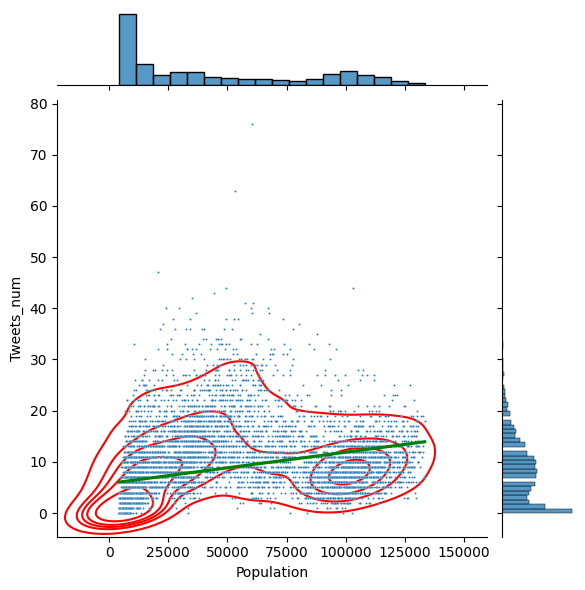

In [33]:
g = sns.jointplot(x="Population", y="Tweets_num", data=df_mobile_tweets, s=2)
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_joint(sns.regplot, color="g", scatter=False, ci=None)
#g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

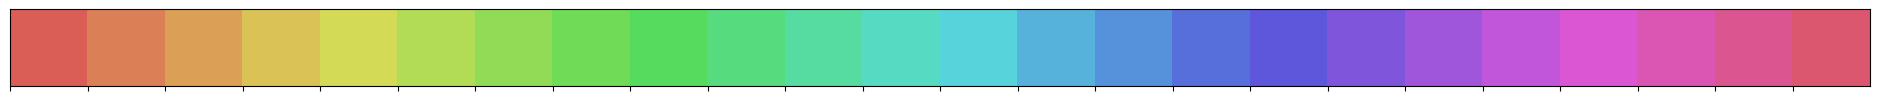

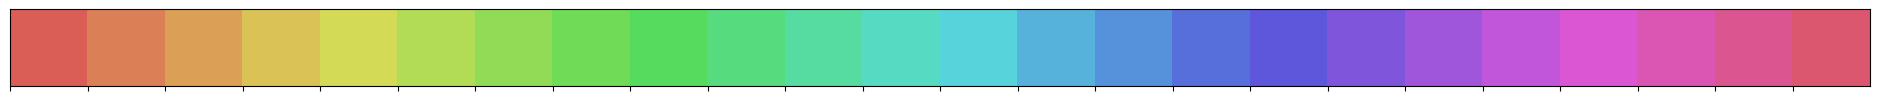

In [42]:
p = sns.palplot(sns.color_palette("hls",24))
sns.palplot(sns.hls_palette(24))

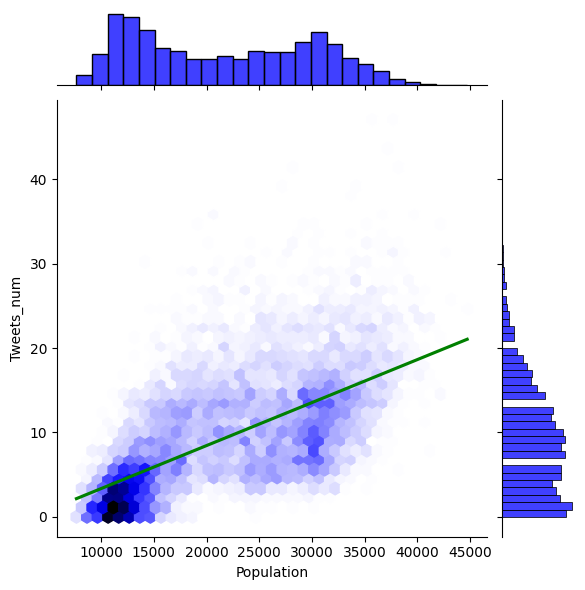

In [46]:

g = sns.jointplot(x="Population", y="Tweets_num", data=df_mobile_tweets, kind='hex', color='b')
#g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_joint(sns.regplot, color="g", scatter=False, ci=None)